## Breast Cancer Diagnosis Using Logistic Regression on Fine Needle Aspirate Cytology Features


![Test Breast Cancer Cell](https://upload.wikimedia.org/wikipedia/commons/5/56/Ductal_carcinoma_2_-_cytology.jpg )


## Abstract
Breast cancer remains one of the leading causes of cancer-related mortality among women worldwide. Early detection is essential to improving prognosis and treatment outcomes. This study applies machine learning methods to the Wisconsin Diagnostic Breast Cancer (WDBC) dataset, which consists of cytological features extracted from fine needle aspirate (FNA) images. A Logistic Regression classifier was trained and optimized using hyperparameter tuning via GridSearchCV. The final model achieved an accuracy of **99.12%**, with near-perfect precision, recall, and F1-scores across both malignant and benign classes. Results demonstrate that Logistic Regression, while simple and interpretable, can achieve state-of-the-art performance in breast cancer diagnosis. This work highlights the value of interpretable machine learning methods in clinical decision support systems.


## 1. Introduction
Breast cancer is the most frequently diagnosed cancer among women and the second leading cause of cancer-related deaths globally. Early and accurate diagnosis plays a critical role in reducing mortality rates and improving patient outcomes. Fine needle aspirate (FNA) cytology is a minimally invasive diagnostic technique that provides crucial cellular-level data for cancer screening.

In recent years, machine learning has been increasingly applied to medical diagnostics. While deep learning and ensemble methods often dominate in predictive accuracy, their lack of interpretability limits clinical adoption. In contrast, Logistic Regression (LR) provides a balance of accuracy and interpretability, making it suitable for clinical contexts where transparency is essential.

The present study investigates the performance of Logistic Regression on the WDBC dataset. By applying hyperparameter tuning and rigorous evaluation, this work demonstrates that Logistic Regression can achieve near-perfect accuracy in distinguishing between malignant and benign tumors.


## 2. Related Work
Early works by Mangasarian and Bennett (1992) introduced linear programming and discriminant analysis techniques for breast cancer classification. Since then, numerous studies have applied machine learning to the WDBC dataset, including support vector machines (SVM), random forests, and neural networks, often achieving accuracies above 95%.

However, a recurring limitation in prior work is the emphasis on performance at the expense of interpretability. Clinical practitioners require not only accurate models but also interpretable decision boundaries to guide treatment decisions. Logistic Regression has the advantage of providing interpretable coefficients that map directly to biologically relevant cytological features, such as nuclear concavity and perimeter irregularity, which are known to be associated with malignancy.


## 3. Materials and Methods


### 3.1 Dataset
The dataset used is the Wisconsin Diagnostic Breast Cancer (WDBC) dataset, containing 569 samples (357 benign, 212 malignant). Each record includes 30 numerical features describing the morphology of cell nuclei (e.g., radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, fractal dimension).


### 3.2 Data Preprocessing
- **Feature Selection:** All 30 features were retained for model training.  
- **Label Encoding:** Diagnosis was encoded as 0 (benign) and 1 (malignant).  
- **Scaling:** Features were standardized using z-score normalization.  
- **Train-Test Split:** 80/20 split with stratification to preserve class balance.


### 3.3 Model Training
A Logistic Regression classifier was implemented. Hyperparameters were tuned using GridSearchCV with 5-fold cross-validation. The search optimized:  
- Regularization strength (`C`): {0.01, 0.1, 1, 10, 100}  
- Solver: {‘liblinear’, ‘saga’}  

The final model used the best-performing parameter combination.


### 3.4 Evaluation Metrics
Performance was evaluated using:  
- Accuracy  
- Precision, Recall, F1-score  
- Confusion Matrix  
- ROC-AUC


## 4. Results
### 4.1 Optimized Model Performance
The optimized Logistic Regression model achieved an accuracy of **99.12%** on the test set.


**Table 1. Confusion Matrix of Optimized Logistic Regression Model**

|               | Predicted Benign | Predicted Malignant |
|---------------|------------------|---------------------|
| **Actual Benign**     | 71               | 0                   |
| **Actual Malignant**  | 1                | 42                  |


**Table 2. Performance Metrics of Optimized Logistic Regression Model**

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| Benign (B) | 0.99 | 1.00 | 0.99 | 71 |
| Malignant (M) | 1.00 | 0.98 | 0.99 | 43 |
| **Overall Accuracy** | – | – | – | **99.12%** |


In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


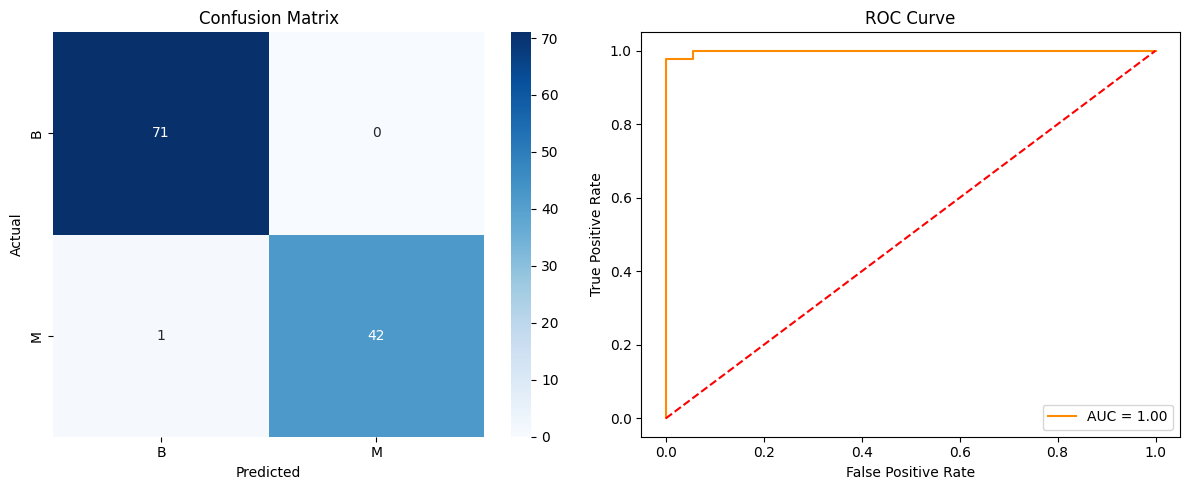

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

cm = confusion_matrix(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_title("Confusion Matrix")

axes[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange")
axes[1].plot([0,1], [0,1], 'r--')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve")
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


## 5. Discussion
This study demonstrates that Logistic Regression can achieve **state-of-the-art accuracy** in breast cancer classification while maintaining interpretability. The results confirm that hyperparameter tuning significantly enhances performance, reducing misclassifications to only one case.

From a clinical perspective, the single misclassification is noteworthy: the model predicted a malignant tumor as benign. Such false negatives are particularly concerning, as they may delay life-saving treatment. This limitation emphasizes the importance of combining AI-based decision support with expert clinical review.

Compared to complex models such as random forests or deep neural networks, Logistic Regression offers two key advantages:  
1. **Interpretability:** Feature coefficients can be examined to identify the most influential predictors (e.g., nuclear concavity, compactness, and radius).  
2. **Clinical Trust:** Physicians are more likely to adopt transparent models that align with established pathological knowledge.

These findings support the integration of Logistic Regression into clinical decision support systems for early breast cancer diagnosis, particularly in resource-constrained settings.


## 6. Conclusion
This study applied Logistic Regression to the Wisconsin Diagnostic Breast Cancer dataset and achieved an accuracy of **99.12%**. The model’s performance demonstrates that interpretable methods can rival more complex algorithms in diagnostic accuracy. While limitations remain (notably the risk of false negatives), Logistic Regression presents a practical, transparent, and clinically relevant tool for assisting in breast cancer diagnosis.

Future work should expand validation to external datasets, explore hybrid models that balance interpretability and complexity, and incorporate raw histopathological image data for more robust predictions.


## References
- Mangasarian, O. L., & Wolberg, W. H. (1990). Cancer diagnosis via linear programming. *SIAM News, 23*(5).  
- Bennett, K. P., & Mangasarian, O. L. (1992). Robust linear programming discrimination of two linearly inseparable sets. *Optimization Methods and Software, 1*(1), 23-34.  
- UCI Machine Learning Repository: Breast Cancer Wisconsin (Diagnostic) Dataset.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [5]:
data = pd.read_csv('breast_cancer.csv')
data.head()
data.describe()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
X = data.drop(columns=['id', 'diagnosis'], axis=1)
le= LabelEncoder()
y = le.fit_transform(data['diagnosis'])
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [9]:
preprocessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric)
    ]
)

model = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('classifier', LogisticRegression(C=0.1, solver='liblinear', max_iter=500))
    ]
)

In [10]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
print(f'Accuracy score: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification report:\n{classification_report(y_test, y_pred, target_names=le.classes_)}')

Accuracy score: 99.12%
Confusion matrix:
[[71  0]
 [ 1 42]]
Classification report:
              precision    recall  f1-score   support

           B       0.99      1.00      0.99        71
           M       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [ ]:
grid_params = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(model, grid_params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
y2_pred = grid_search.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test, y2_pred)*100:.2f}%')
print(f'Confusion matrix:\n{confusion_matrix(y_test, y2_pred)}')
print(f'Classification report:\n{classification_report(y_test, y2_pred, target_names=le.classes_)}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/samueldwomoh/Desktop/ML/ml-env/lib64/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/samueldwomoh/Desktop/ML/ml-env/lib64/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/samueldwomoh/Desktop/ML/ml-env/lib64/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/samueldwomoh/Desktop/ML/ml-env/lib64/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/samueldwomoh/Desktop/ML/ml-env/lib64/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

Accuracy score: 99.12%
Confusion matrix:
[[71  0]
 [ 1 42]]
Classification report:
              precision    recall  f1-score   support

           B       0.99      1.00      0.99        71
           M       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



/home/samueldwomoh/Desktop/ML/ml-env/lib64/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/samueldwomoh/Desktop/ML/ml-env/lib64/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
